## Tips and Hints
You must put the ch05_test_archive.pkl file inside the mavsim_python\mav_sim\unit_tests folder. This file can be found on canvas under Files->Unit_tests.

It is often easier to debug the code using the debugger and run the code in python instead of through the Jupyter file. 

## Problem 1: Creating trim trajectory calculator
A trim state and input produce constant dynamic outputs. One way to produce the trim states and inputs is to solve an optimization problem that results in the desired trim state derivative. Consider the objective function defined as

$$
    \min_{x_{trim}, \delta_{trim}} \bigl( f(x_{trim}, \delta_{trim}) - f_d \bigr)^T Q \bigl( f(x_{trim}, \delta_{trim}) - f_d \bigr)
$$
where $f(x_{trim}, \delta_{trim})$ denotes the dynamics given the trim state and input, $f_d$ denotes the desired dynamics, and $Q \succeq 0$ is a diagonal matrix with weights along the diagonal. If possible, the optimization will produce trim states and inputs such that $f = f_d$. 

Implement the following functions in `chap5\trim.py` using the cost and constraints discussed in lecture and described in the function docstrings.
* `velocity_constraint`
* `velocity_constraint_partial`
* `variable_bounds`
* `trim_objective_fun`

In [1]:
# Note that this cell can be run separately to initialize for other cell blocks
import numpy as np
from mav_sim.chap3.mav_dynamics import DynamicState
from mav_sim.chap4.run_sim import run_sim
from mav_sim.message_types.msg_sim_params import MsgSimParams
from mav_sim.message_types.msg_delta import MsgDelta
from mav_sim.tools.display_figures import display_data_view, display_mav_view
from mav_sim.chap2.mav_viewer import MavViewer
from mav_sim.chap3.data_viewer import DataViewer
from mav_sim.chap5.trim import compute_trim
from IPython.display import display # Used to display variables nicely in Jupyter
from mav_sim.chap3.mav_dynamics import DynamicState, derivatives
from mav_sim.chap4.mav_dynamics import forces_moments, update_velocity_data
from mav_sim.tools.signals import Signals

# The viewers need to be initialized once due to restart issues with qtgraph
if 'mav_view' not in globals():
    print("Initializing mav_view")
    global mav_view
    mav_view = MavViewer()  # initialize the mav viewer
if 'data_view' not in globals():
    print("Initializing data_view")
    global data_view
    data_view = DataViewer()  # initialize view of data plots

# Initialize state values
sim_params = MsgSimParams(end_time=40.)
state = DynamicState()

# Functions used below
def run_sim_and_display(delta_fnc, init_state):
    global mav_view
    global data_view
    data_view.reset(sim_params.start_time)
    (mav_view, data_view) = run_sim(sim_params, delta_fnc, DynamicState(init_state), mav_view, data_view)
    display_data_view(data_view)
    display_mav_view(mav_view)

Initializing mav_view
Initializing data_view


## Problem 2 - Calculate Trim
Do the following:
1. Compute a trim state and input for $V_a = 25 \frac{m}{s}$, $\gamma = 0$, and $R=\infty$
2. Show that the resulting dynamics are close to the desired dynamics
3. Simulate the state and show that the trim values are achieved for a period before numerical errors enter the system

Keep in mind the following when comparing results:
* $\dot{p_n}$ and $\dot{p_e}$ are not important
* Your trim state dynamics will not be exact, but they should be close

trim_state = 


array([[ 1.56456305e-13],
       [ 8.22028805e-16],
       [-1.00000000e+02],
       [ 2.49686227e+01],
       [ 5.34134069e-21],
       [ 1.25215085e+00],
       [ 9.99686174e-01],
       [-8.30798869e-05],
       [ 2.50508635e-02],
       [ 2.08187675e-06],
       [ 0.00000000e+00],
       [ 1.00000000e-12],
       [-7.27619110e-09]])

trim input = 
elevator= -0.12504364980549867 aileron= 0.0018374628777805895 rudder= -0.0002928845829161399 throttle= 0.6767758538404223
Difference between actual and desired (Note that pn and pe are not important):


array([[ 2.50000000e+01],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 9.58813611e-02],
       [ 1.62808435e-03],
       [ 5.57452260e+00],
       [-1.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-2.71964544e-06],
       [ 5.00806667e+00],
       [-1.28249649e-06]])

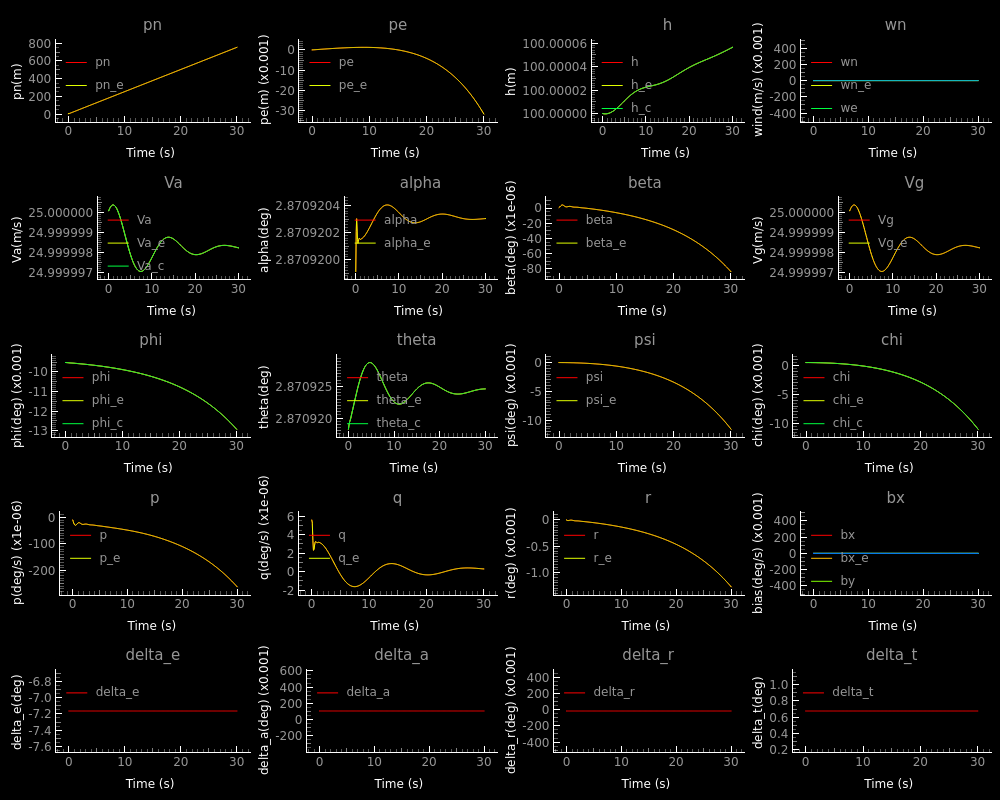

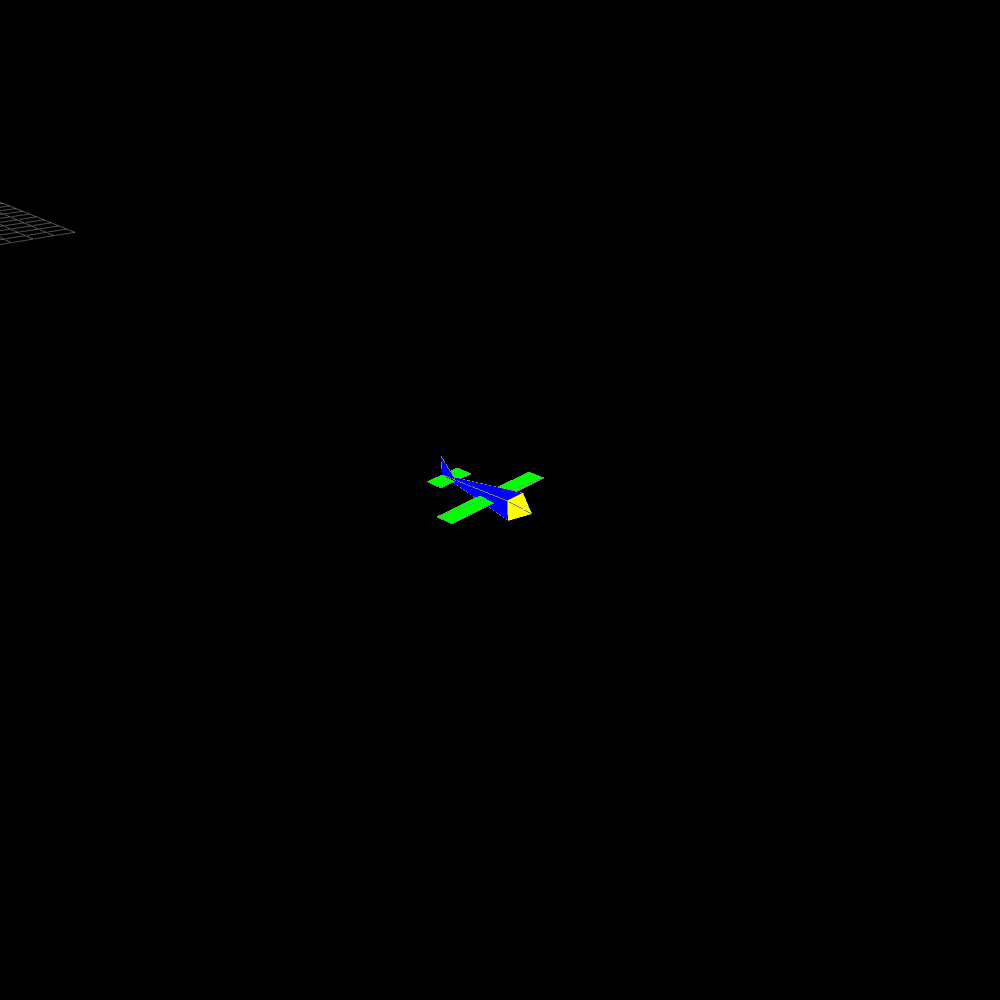

In [2]:
from mav_sim.chap5.trim import calculate_desired_derivatives_quat 

state_numpy = state.convert_to_numpy()

# Create the trim state
Va_trim = 25.
gamma_trim = 0.
R = np.inf
trim_state, trim_input = compute_trim(state_numpy, Va_trim, gamma_trim, R)

# Display the trim state and input
print('trim_state = ')
display(trim_state)
print('trim input = ')
trim_input.print()

# Calculate the desired state dynamics
desired_trim_state_dot = calculate_desired_derivatives_quat(Va_trim, gamma_trim, np.inf)

# Calculate the actual state dynamics
Va, alpha, beta, _ = update_velocity_data(state_numpy)
forces_moments_v = forces_moments(state_numpy, trim_input, Va, beta, alpha)
f = derivatives(state_numpy, forces_moments_v)

# Display the difference
f_diff = f - desired_trim_state_dot
print("Difference between actual and desired (Note that pn and pe are not important):")
display(f_diff)

# Create a passthrough function for the trim input
pass_delta2 = lambda sim_time: trim_input
run_sim_and_display(pass_delta2, trim_state)

## Problem 3 - Trim Calculations
Repeat problem 2 with $V_a = 25 \frac{m}{s}$, $\gamma = 5$ degrees, and $R=\infty$


trim_state = 


array([[ 1.15610176e-13],
       [ 3.15872490e-14],
       [-1.00000000e+02],
       [ 2.49695712e+01],
       [ 1.12502393e-22],
       [ 1.23309051e+00],
       [ 9.97668081e-01],
       [-2.69793085e-04],
       [ 6.82519348e-02],
       [ 1.84569402e-05],
       [ 1.11261593e-20],
       [ 1.00000000e-12],
       [-7.43614985e-09]])

trim input = 
elevator= -0.1229308944118712 aileron= 0.005932661195054347 rudder= -0.000945798523660578 throttle= 0.7737438667661622
Difference between actual and desired (Note that pn and pe are not important):


array([[ 2.50000000e+01],
       [ 0.00000000e+00],
       [ 2.17889357e+00],
       [ 9.49910791e-01],
       [ 5.25605233e-03],
       [ 5.56908008e+00],
       [-1.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-9.18694344e-07],
       [ 4.93177002e+00],
       [ 2.33136701e-07]])

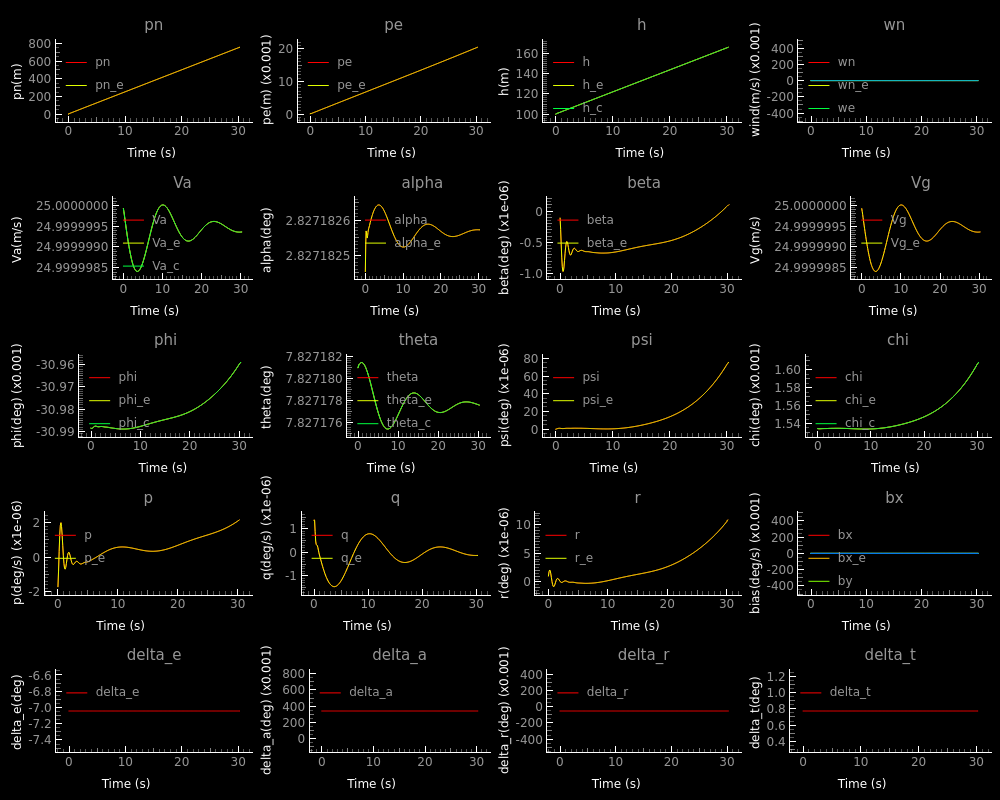

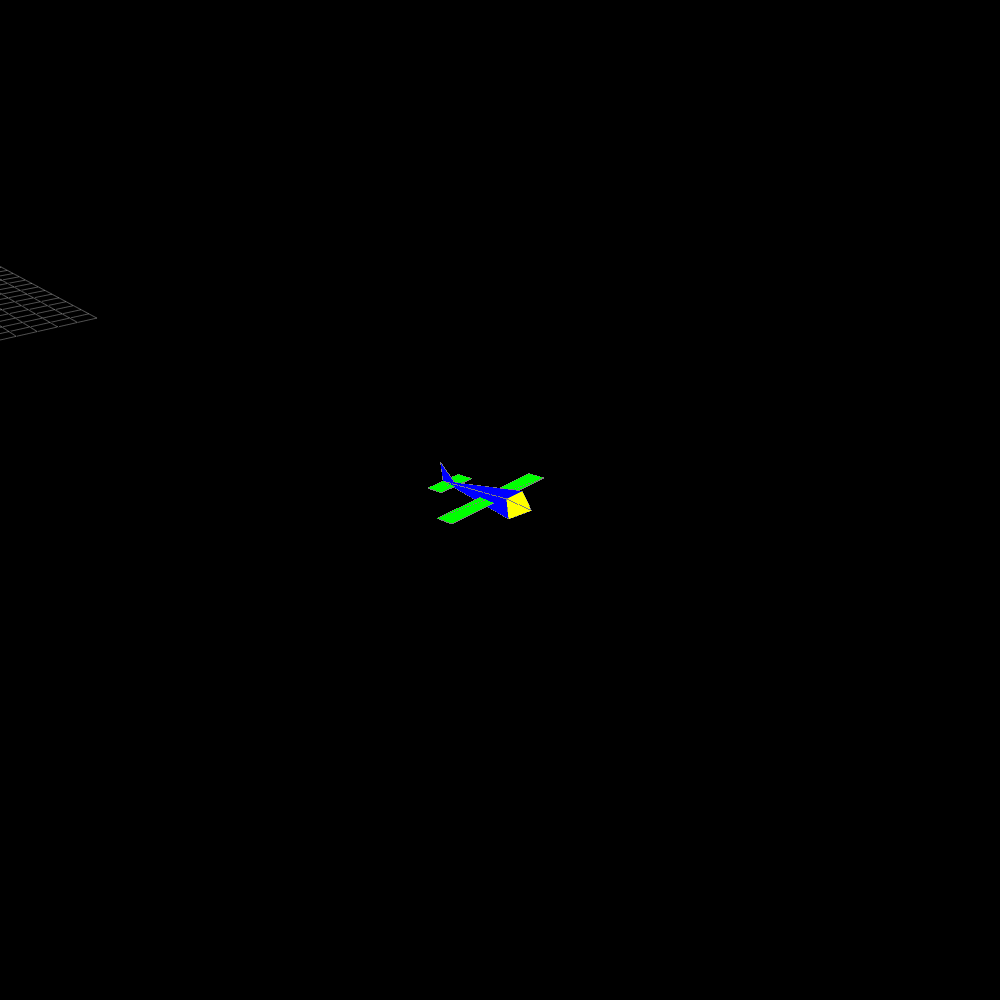

In [3]:
# Create the trim state
Va_trim = 25.
gamma_trim = 5. * (np.pi / 180)
R = np.inf
trim_state, trim_input = compute_trim(state_numpy, Va_trim, gamma_trim, R)

# Display the trim state and input
print('trim_state = ')
display(trim_state)
print('trim input = ')
trim_input.print()

# Calculate the desired state dynamics
desired_trim_state_dot = calculate_desired_derivatives_quat(Va_trim, gamma_trim, R)

# Calculate the actual state dynamics
Va, alpha, beta, _ = update_velocity_data(state_numpy)
forces_moments_v = forces_moments(state_numpy, trim_input, Va, beta, alpha)
f = derivatives(state_numpy, forces_moments_v)

# Display the difference
f_diff = f - desired_trim_state_dot
print("Difference between actual and desired (Note that pn and pe are not important):")
display(f_diff)

# Create a passthrough function for the trim input
pass_delta2 = lambda sim_time: trim_input
run_sim_and_display(pass_delta2, trim_state)

## Problem 4 - Trim Calculations
Repeat problem 2 with $V_a = 30 \frac{m}{s}$, $\gamma = 3$ degrees, and $R=800 m$ 

trim_state = 


array([[ 2.91433026e-13],
       [ 1.63057626e-15],
       [-1.00000000e+02],
       [ 2.49694628e+01],
       [ 0.00000000e+00],
       [ 1.23528419e+00],
       [ 9.97898666e-01],
       [ 4.02272812e-02],
       [ 5.07526568e-02],
       [-2.04594060e-03],
       [ 1.86111882e-18],
       [ 1.00000000e-12],
       [ 3.11471963e-02]])

trim input = 
elevator= -0.12317119995744982 aileron= 0.0017011983845674635 rudder= -0.002754663176023664 throttle= 0.7367055262738097
Difference between actual and desired (Note that pn and pe are not important):


array([[ 2.50000000e+01],
       [ 0.00000000e+00],
       [ 1.30839891e+00],
       [ 6.08143386e-01],
       [-7.84294758e-03],
       [ 5.56969911e+00],
       [-9.99878267e-01],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-1.56029533e-02],
       [-3.39662592e-01],
       [ 4.94044803e+00],
       [ 3.82371767e-02]])

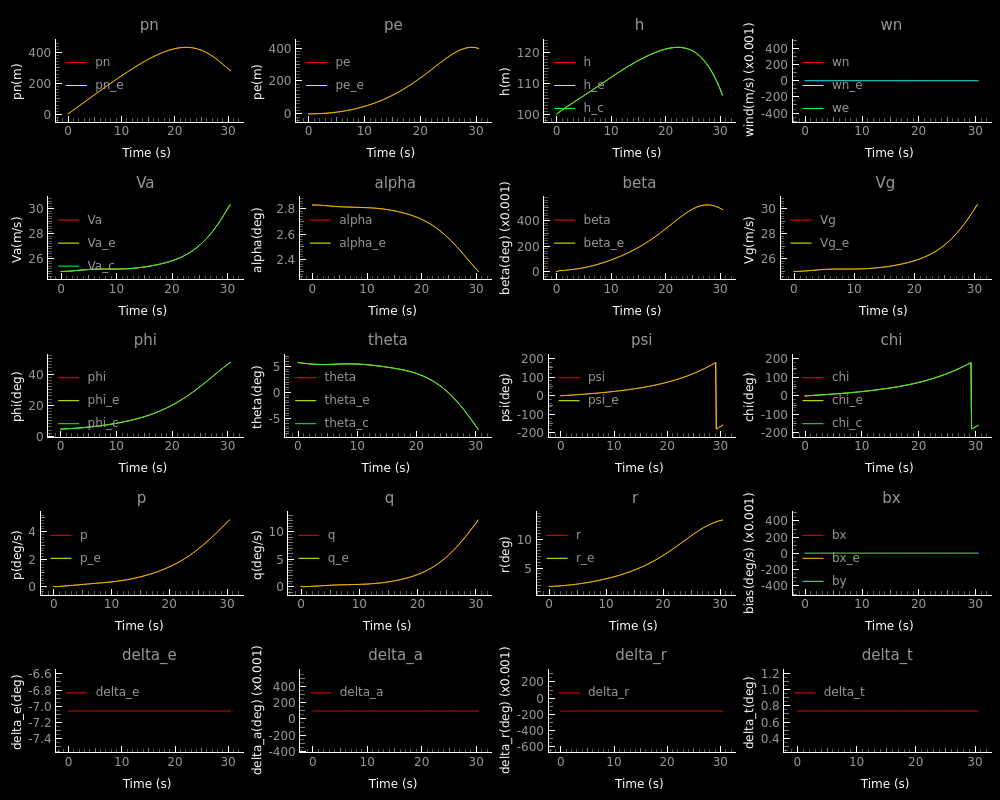

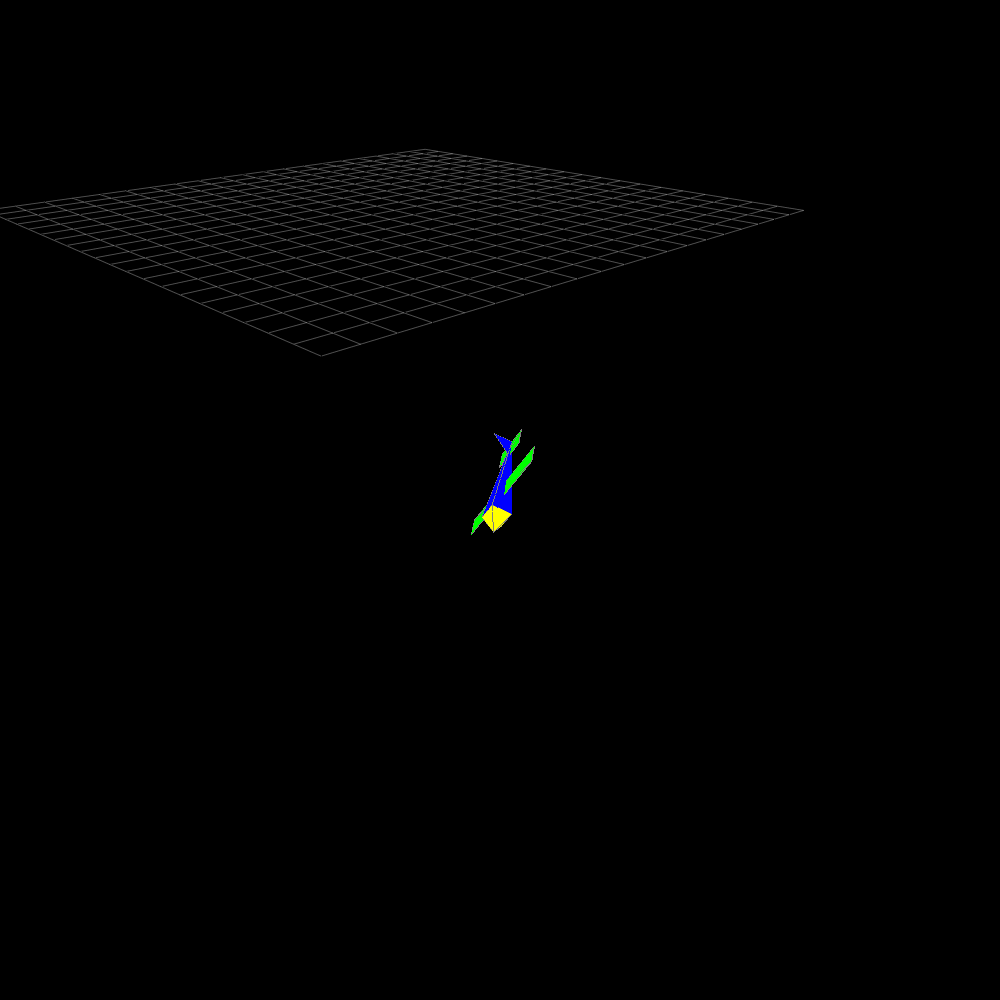

In [4]:
# Create the trim state
Va_trim = 25.
gamma_trim = 3. * (np.pi / 180)
R = 800
trim_state, trim_input = compute_trim(state_numpy, Va_trim, gamma_trim, R)

# Display the trim state and input
print('trim_state = ')
display(trim_state)
print('trim input = ')
trim_input.print()

# Calculate the desired state dynamics
desired_trim_state_dot = calculate_desired_derivatives_quat(Va_trim, gamma_trim, R)

# Calculate the actual state dynamics
Va, alpha, beta, _ = update_velocity_data(state_numpy)
forces_moments_v = forces_moments(state_numpy, trim_input, Va, beta, alpha)
f = derivatives(state_numpy, forces_moments_v)

# Display the difference
f_diff = f - desired_trim_state_dot
print("Difference between actual and desired (Note that pn and pe are not important):")
display(f_diff)

# Create a passthrough function for the trim input
pass_delta2 = lambda sim_time: trim_input
run_sim_and_display(pass_delta2, trim_state)

## Problem 5 - Evaluate Eigenvalues of Longitudinal System
The `compute_ss_model(...)` function inside `chap5\compute_models.py` provides a numerical approximation for the models described in (5.44) and (5.51). 

For the trim trajectory corresponding to $V_a = 25 \frac{m}{s}$ and $\gamma = 0$, do the following:
* Calculate the eigenvalues of $A_{lon}$ and $A_{lat}$
* Answer the questions below

### Question: Which eigenvalue(s) correspond to the short-period mode?
2 (-4.87859823111082+9.869570412839407j) omega_n= 3.318057006339008\
3 (-4.87859823111082-9.869570412839407j) omega_n= 3.318057006339008

### Question: Which eigenvalue(s) correspond to the phugoid mode?
4 (-0.10413334688479597+0.48908572806771156j) omega_n= 0.7071411464275702\
5 (-0.10413334688479597-0.48908572806771156j) omega_n= 0.7071411464275702

### Question: Which eigenvalue(s) corresponds to the spiral-divergence mode?
4 (0.08939431273403844+0j)\
5 (3.0290704511101846e-12+0j)

### Question: Which eigenvalue(s) corresponds to the roll mode?
1 (-22.44115989240848+0j)

### Question: Which eigenvalue(s) corresponds to the dutch-roll mode?
2 (-1.1407562032446528+4.655061986908683j)\
3 (-1.1407562032446528-4.655061986908683j)


In [27]:
from mav_sim.chap5.compute_models import compute_ss_model
Va_trim = 25.
gamma_trim = 0.
R = np.inf

# Compute the trim state and input
trim_state, trim_input = compute_trim(state_numpy, Va_trim, gamma_trim, R)

# Compute A_lon and A_lat
A_lon, B_lon, A_lat, B_lat = compute_ss_model(trim_input=trim_input, trim_state=trim_state)

# Compute the eigenvalues of A_lon
A_lon_eig = np.linalg.eigvals(A_lon)

# Compute the eigenvalues of A_lat
A_lat_eig = np.linalg.eigvals(A_lat)

print("A lon val:")
for i, val in enumerate(A_lon_eig):
    omega_n = np.sqrt(np.abs(val))
    print(i+1, val,"omega_n=", omega_n)

print("\n\nA lon val:")
for i, val in enumerate(A_lat_eig):
    print(i+1, val)

A lon val:
1 0j omega_n= 0.0
2 (-4.87859823111082+9.869570412839407j) omega_n= 3.318057006339008
3 (-4.87859823111082-9.869570412839407j) omega_n= 3.318057006339008
4 (-0.10413334688479597+0.48908572806771156j) omega_n= 0.7071411464275702
5 (-0.10413334688479597-0.48908572806771156j) omega_n= 0.7071411464275702


A lon val:
1 (-22.44115989240848+0j)
2 (-1.1407562032446528+4.655061986908683j)
3 (-1.1407562032446528-4.655061986908683j)
4 (0.08939431273403844+0j)
5 (3.0290704511101846e-12+0j)


## Problem 6 - Phugoid mode
For the trim trajectory corresponding to $V_a = 25 \frac{m}{s}$ and $\gamma = 0$, use a doublet to excite the phugoid mode. Simulate the response. (Note that this problem is provided for you)

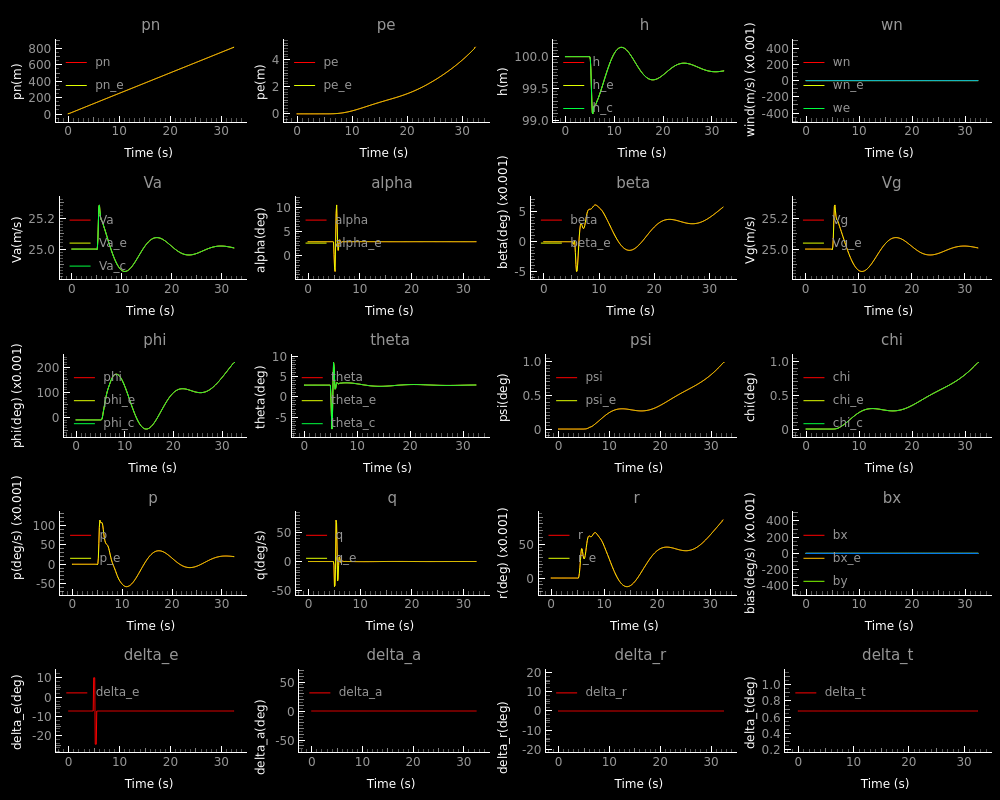

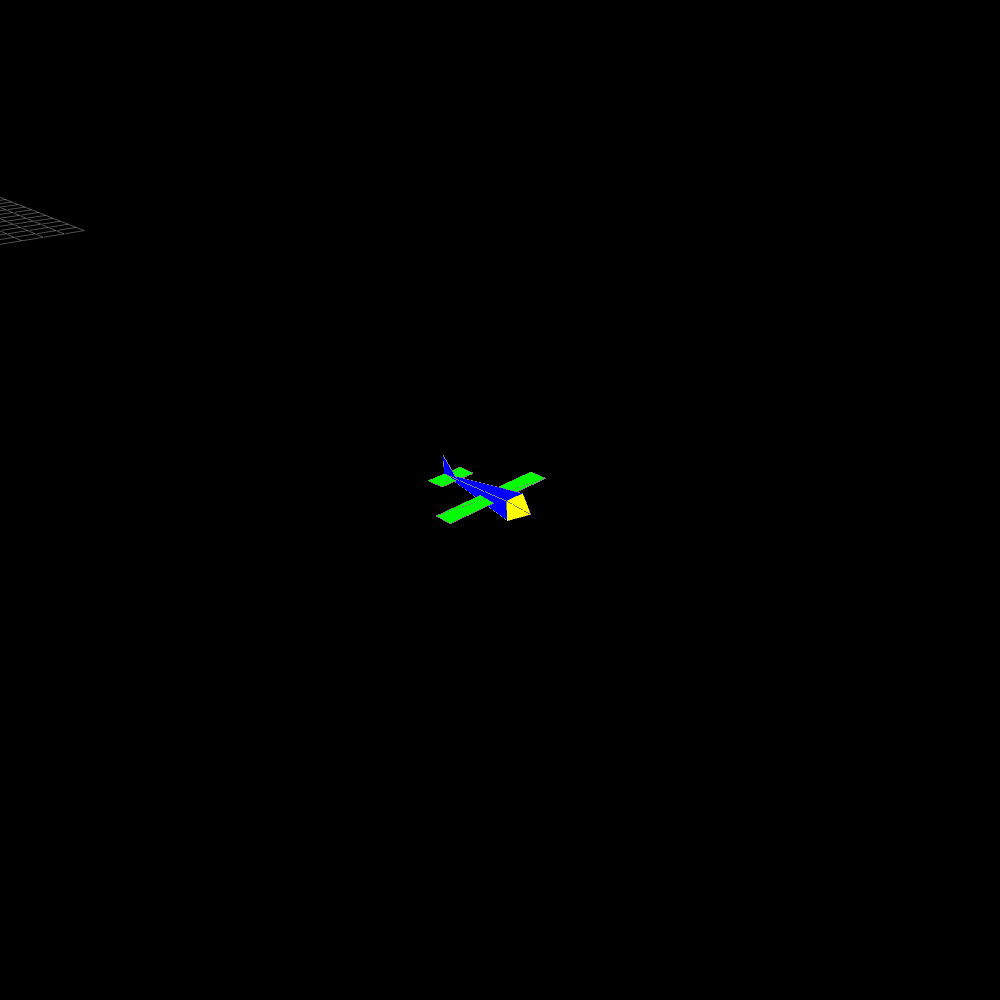

In [22]:
# Create the trim state
Va_trim = 25.
gamma_trim = 0.
trim_state, trim_input = compute_trim(state.convert_to_numpy(), Va_trim, gamma_trim)

# Create an input signal
input_signal = Signals(amplitude=0.3,
                    duration=0.3,
                    start_time=5.0)

# Create a function for exciting the phugoid mode
def excite_phugoid(sim_time: float):
    # copy the trim command
    delta_cmd = MsgDelta()
    delta_cmd.copy(trim_input)

    # Excite the phugoid mode
    delta_cmd.elevator += input_signal.doublet(sim_time)
    return delta_cmd

# Run the command
run_sim_and_display(excite_phugoid, trim_state)

## Problem 7 - Roll and spiral divergence modes
For the trim trajectory corresponding to $V_a = 25 \frac{m}{s}$ and $\gamma = 0$, use a doublet to excite the roll and spiral divergence modes.

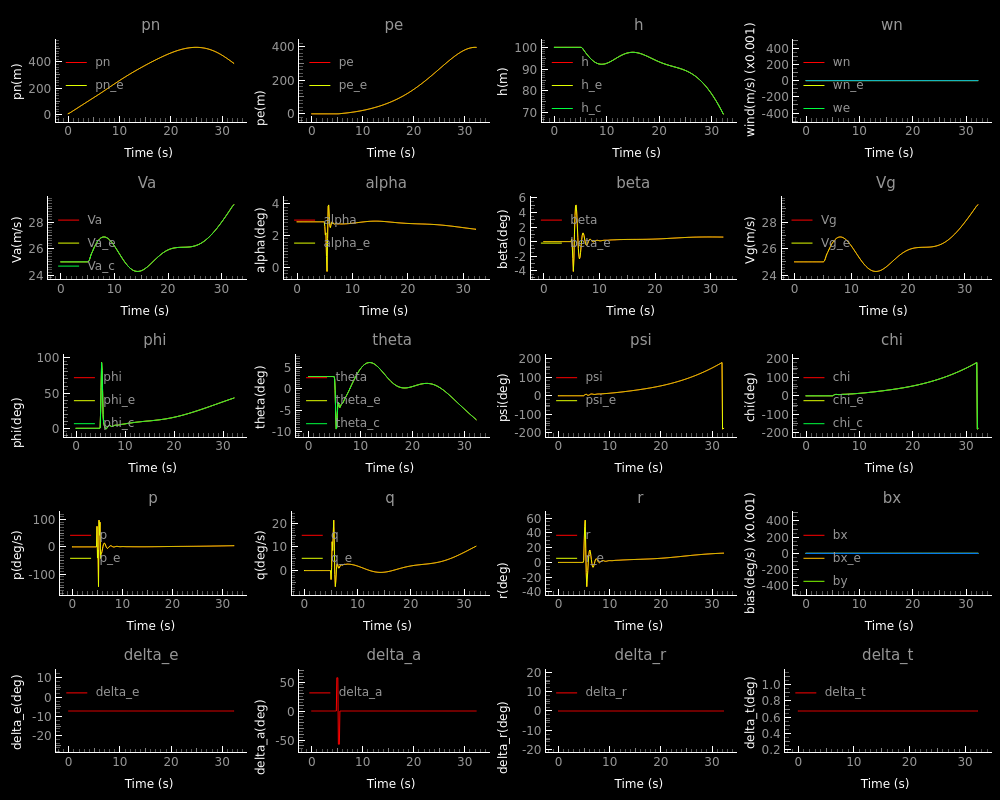

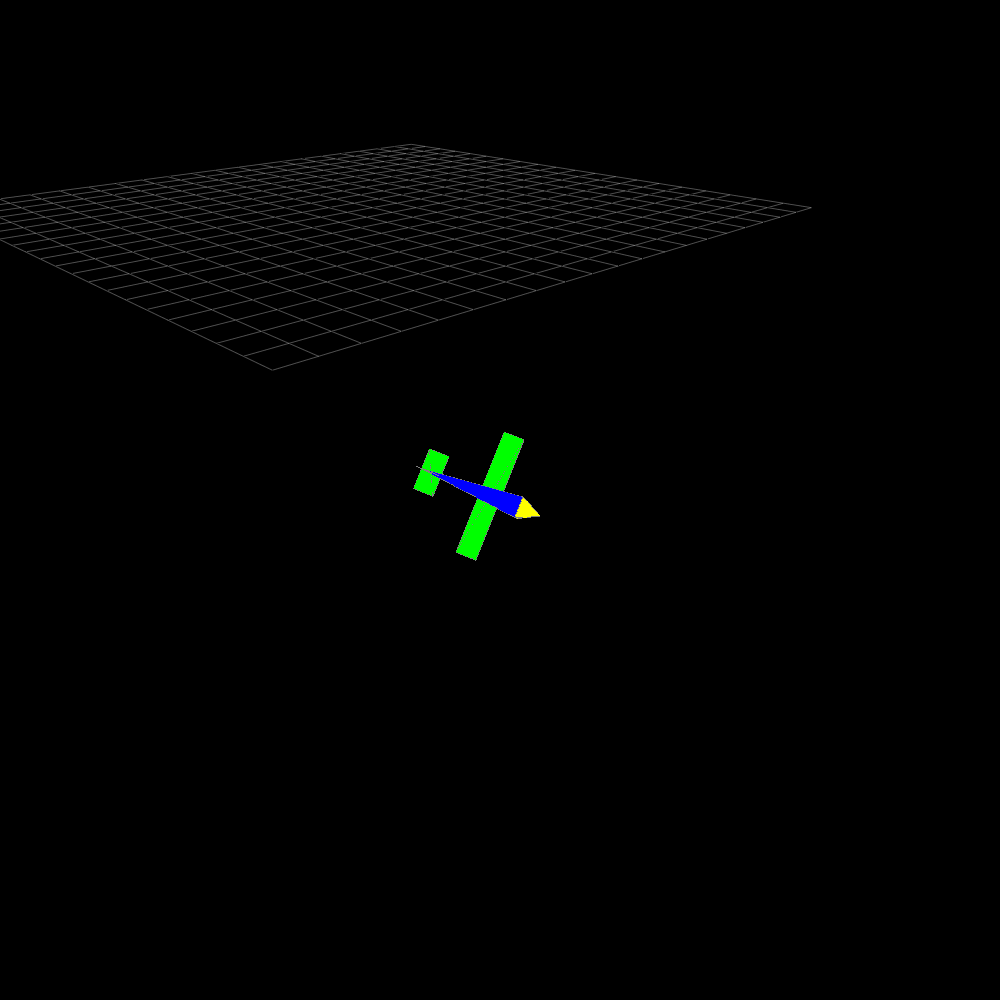

In [21]:
# Create the trim state
Va_trim = 25.
gamma_trim = 0.
trim_state, trim_input = compute_trim(state.convert_to_numpy(), Va_trim, gamma_trim)

# Create an input signal
input_signal = Signals(amplitude=1,
                    duration=0.3,
                    start_time=5.0)


# Create a function for exciting the roll and spiral modes
def excite_roll_and_spiral(sim_time: float):
    # copy the trim command
    delta_cmd = MsgDelta()
    delta_cmd.copy(trim_input)

    # Excite the roll mode and spiral mode
    delta_cmd.aileron += input_signal.doublet(sim_time)

    return delta_cmd

# Run the command
run_sim_and_display(excite_roll_and_spiral, trim_state)

## Problem 8 - Dutch roll mode
For the trim trajectory corresponding to $V_a = 25 \frac{m}{s}$ and $\gamma = 0$, use a doublet to excite the dutch roll mode.

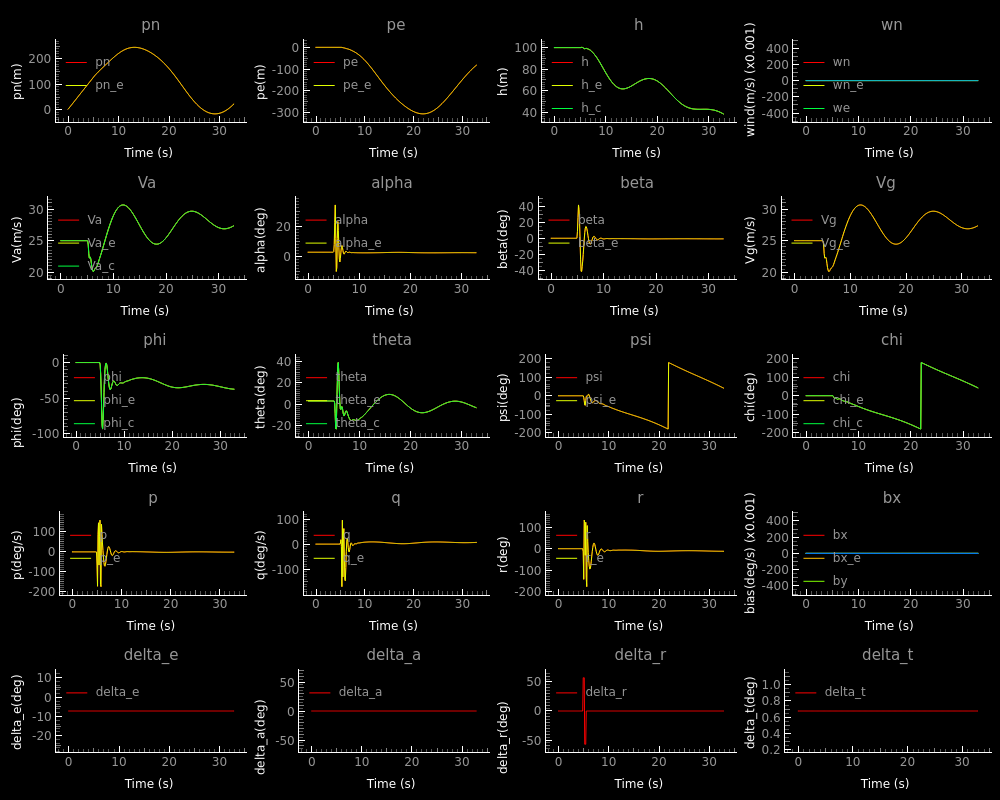

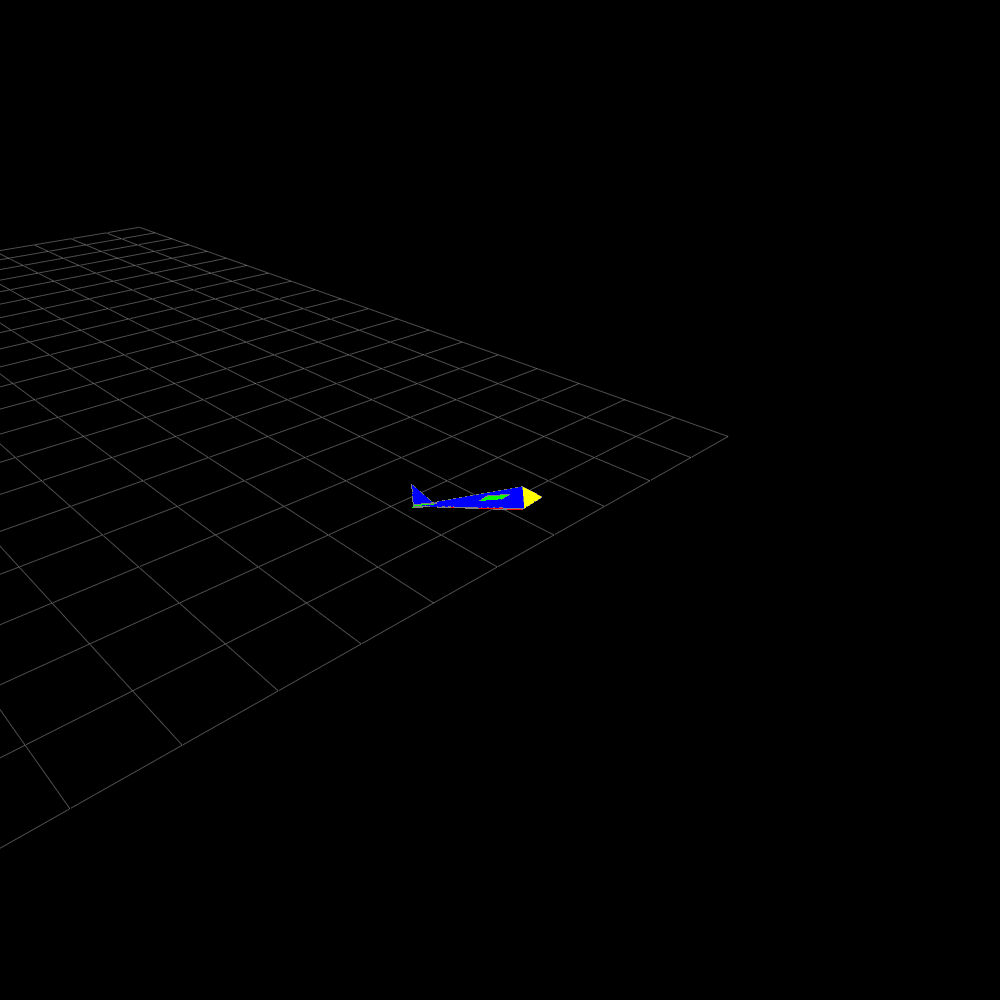

In [24]:
# Create the trim state
Va_trim = 25.
gamma_trim = 0.
trim_state, trim_input = compute_trim(state.convert_to_numpy(), Va_trim, gamma_trim)

# Create an input signal
input_signal = Signals(amplitude=1,
                    duration=0.3,
                    start_time=5.0)

# Create a function for exciting the roll and spiral modes
def excite_dutch_roll_mode(sim_time: float):
    # copy the trim command
    delta_cmd = MsgDelta()
    delta_cmd.copy(trim_input)

    # Excite the roll mode and spiral mode
    delta_cmd.rudder += input_signal.doublet(sim_time)

    return delta_cmd

# Run the command
run_sim_and_display(excite_dutch_roll_mode, trim_state)

## Static analysis
Run the static code analysis (you must have zero static code analysis errors to get credit). You may not modify the static code analysis configuration files.

### ISORT
Run Isort:
```
python -m isort mav_sim book_assignments
```

Terminal output (should be nothing):

### MyPy
Run MyPy
```
python -m mypy mav_sim/chap2/ mav_sim/chap3/ mav_sim/chap4/ mav_sim/chap5/ book_assignments
```

Terminal output (should indicate no error):
```
Success: no issues found in 29 source files
```

### Pylint
Run Pylint
```
python -m pylint --jobs 0 --rcfile .pylintrc mav_sim/chap2/ mav_sim/chap3/ mav_sim/chap4/ mav_sim/chap5/ book_assignments/
```

Terminal output (should indicate `10/10`)
```
Your code has been rated at 10.00/10 (previous run: 10.00/10, +0.00)
```

## Simple code checking
The following code does not need to change. It should just be used as a sanity check so that you know the code is implemented properly. The output should not have any lines reading `Failed test!`

Note that due to the random nature of the test, you may get a warning stating
```
RuntimeWarning: invalid value encountered in sqrt
  omega_p = (-b + np.sqrt(b**2 - 4*a*c)) / (2.*a)
```
Just ignore that warning.

In [28]:
from mav_sim.unit_tests.ch5_dynamics_test import run_auto_tests, VelocityConstraintTest, VelocityConstraintPartialTest, VariableBoundsTest, TrimObjectiveFunTest
run_auto_tests()


Starting velocity_constraint test
Passed test on velocity_constraint

Starting velocity_constraint_partial test
Passed test on velocity_constraint_partial

Starting variable_bounds test
Passed test on variable_bounds

Starting trim_objective_fun test
Passed test on trim_objective_fun
